# Microsoft Studios Movie Analysis
### Phase 1 Project - Sidney Kung

## Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Overview
This project analyzes the measurements of popularity for movies released in theaters, using data collected from [IMDB.com](imdb.com) and [theMovieDB.org](https://www.themoviedb.org/). Descriptive analysis of this data shows that …(conclusion)… Microsoft can use this analysis to successfully open a movie production studio.

## Understanding the Data

This analysis uses dataset `all_movies`, which was compiled from four subset files of data from the websites IMDB.com and theMovieDB.org. Each subset contained useful information about measures of popularity. I cleaned the subsets before merging them to `all_movies` and imported the final dataset here for analysis. The data cleaning notebook can be found here under the name `data_cleaning.ipynb`.

Origin file and purpose:
1. imdb.title.basics.csv.gz
	* Base information for each movie from IMDB.com
2. imdb.title.ratings.csv.gz
	* Average rating for each movie, in IMDB.com metrics
3. tmdb.movies.csv.gz
	* Average rating for each movie, in theMovieDB.org metrics
4. tn.movie_budgets.csv.gz
	* Financial data for each movie from theMovieDB.org

## Business Questions:
I will be investigating three main questions through exploratory data analysis.
1.	What time of the year are movies the most popular?
2.	What is an appropriate budget range for popular movies?
3.	What is the most popular movie genre?

## Analysis

In [53]:
# importing the necessary pandas and matplotlib libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
# loading all_movies_df and setting it to the variable all_movies
all_movies = pd.read_csv('all_movies_df.csv')

## 1. Average Domestic Gross Each Month
It is essential that movies are released at the right time of the year, to ensure that enough customers buy tickets at the box office. I will be calculating the average domestic gross for all relevant movies the `all_movies` dataset, to analyze what the optimal release times are during the year.

In [55]:
# Creating a new column of release dates without year
all_movies['release_month'] = pd.DatetimeIndex(all_movies['release_date_x']).month

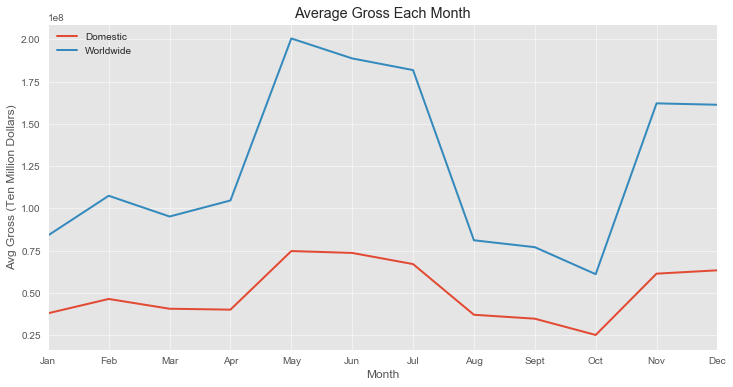

In [56]:
# x-axis: sorting dataframe by months and setting that equal to months
all_movies.sort_values(by='release_month', ascending=True)
months = sorted(all_movies['release_month'].unique())
# y-axis: average gross (ten million dollars)
# comparing domestic_gross and worldwide_gross
d_gross = all_movies.groupby('release_month')['domestic_gross'].mean()
w_gross = all_movies.groupby('release_month')['worldwide_gross'].mean()

# creating a line plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(months, d_gross)
ax.plot(months, w_gross)

# legend
plt.legend(['Domestic', 'Worldwide'], loc=2)

# setting title and axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Avg Gross (Ten Million Dollars)')
ax.set_title('Average Gross Each Month')

# setting x-axis labels to match each month
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.savefig('visualizations/avg_gross.pdf')
plt.show()

The average gross earned each month is approximately parallel for domestic and worldwide distribution. The one exception is between March and April; while the average domestic gross declines, average worldwide gross increases. 

Movies earn the highest worldwide gross during the summer, between May and July. There is also another ~146% increase spike between October and November. Therefore, the release periods for optimal worldwide and domestic gross are during the summer and winter seasons, aimed around those months.


## 2. Average Return on Investment (ROI) 
- working with production_budget and worldwide_gross
- graph would be a line plot

In [77]:
# calculating the ROI for each movie by dividing the 'worldwide_gross' and 'production_bugdet' columns, multipling 100 to get a percentage, and creating new column 'roi'
all_movies['roi'] = (all_movies['worldwide_gross'] / all_movies['production_budget']) * 100

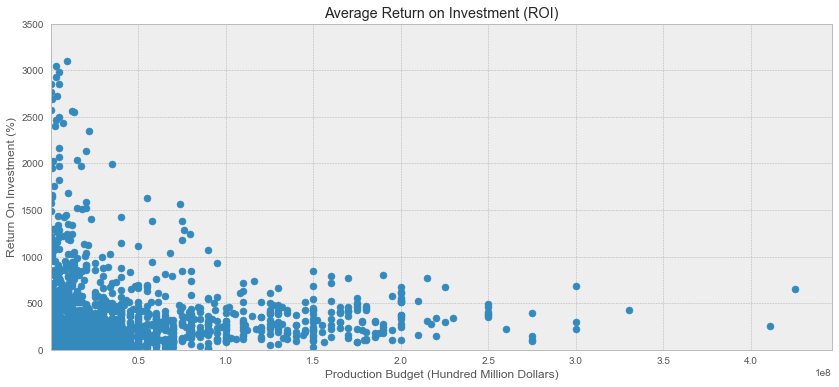

In [91]:
# x-axis
prod_budget = all_movies['production_budget']
# y-axis
roi = all_movies['roi']

# creating a scatter plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(14,6))
roi_plot = ax.scatter(prod_budget, roi)

# setting title, axis labels and limits
ax.set_xlabel('Production Budget (Hundred Million Dollars)')
ax.set_ylabel('Return On Investment (%)')
ax.set_title('Average Return on Investment (ROI)')
ax.set_xlim(.1)
ax.set_ylim(0, 3500)

plt.savefig('visualizations/avg_roi.pdf')
plt.show()

There is a density of production budgets between 100 and 10 hundred million. Movies with this budget range have the highest ROI in general, with a high of approximately 3200%. Beyond that range, other movies don’t have an ROI beyond 1000%

## 3. Average Budget According to Runtime
When working with a written script, the length of the movie can be estimated. Therefore, it’s important to plan for an expected budget before production. 


In [59]:
# calculating revenue for each movie by vectorizing 'worldwide_gross' and 'budget', and creating a new column 'revenue'
all_movies['raw_revenue'] = all_movies['worldwide_gross'] - all_movies['production_budget']

# binning 'revenue' column by IQR intervals, and calculating to exclude outliers
all_movies['revenue'] = pd.cut(all_movies['raw_revenue'], bins=[-1614407,13874970,78809720,118214580], labels=['low','medium', 'high'])

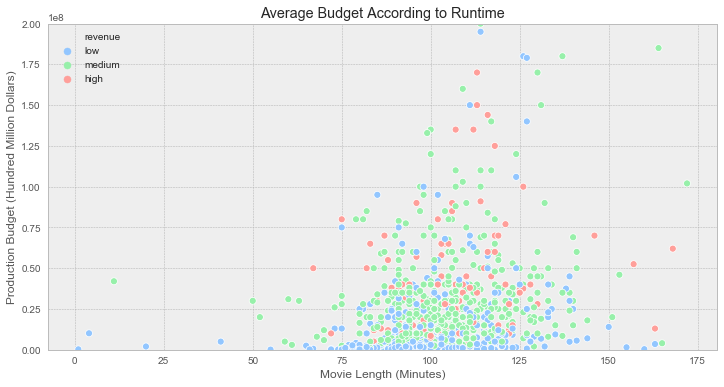

In [61]:
# create scatterplot using seaborn
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=all_movies, x="runtime_minutes", y="production_budget", hue="revenue", hue_order=['low','medium','high'])

# legend in upper left corner
plt.legend(loc=2)

# setting title, axis labels and y-limit
ax.set_xlabel('Movie Length (Minutes)')
ax.set_ylabel('Production Budget (Hundred Million Dollars)')
ax.set_title('Average Budget According to Runtime')

# set y-limit
ax.set_ylim(0, 200000000)

plt.savefig('visualizations/avg_budget_runtime.pdf')
plt.show()

## 4. Average Rating per Genre
- working with genre and imdb_avg_rating
- graph would be a bar plot, with x:genre and y:rating

In [62]:
# creating new DataFrame with 'genre' and 'imdb_avg_rating' columns from all_movies
all_genres = all_movies[['genres', 'imdb_avg_rating','db_popularity']].copy()

# replacing 'missing' with NaN value and dropping those rows
all_genres['genres'] = all_genres['genres'].replace('missing', np.NaN)
all_genres.dropna(inplace=True)
# splitting 'genres' column
all_genres[['Genre_1','Genre_2','Genre_3']] = all_genres.genres.str.split(",",expand=True,)

# all_genres = all_genres[all_genres.genres != 'missing']
# all_genres.genres = src.coerce_to_list(all_genres,'genres')
# scaffold = all_genres[['genres', 'imdb_avg_rating', 'db_popularity']]
# all_genres = src.generate_genre_dataframe(scaffold)

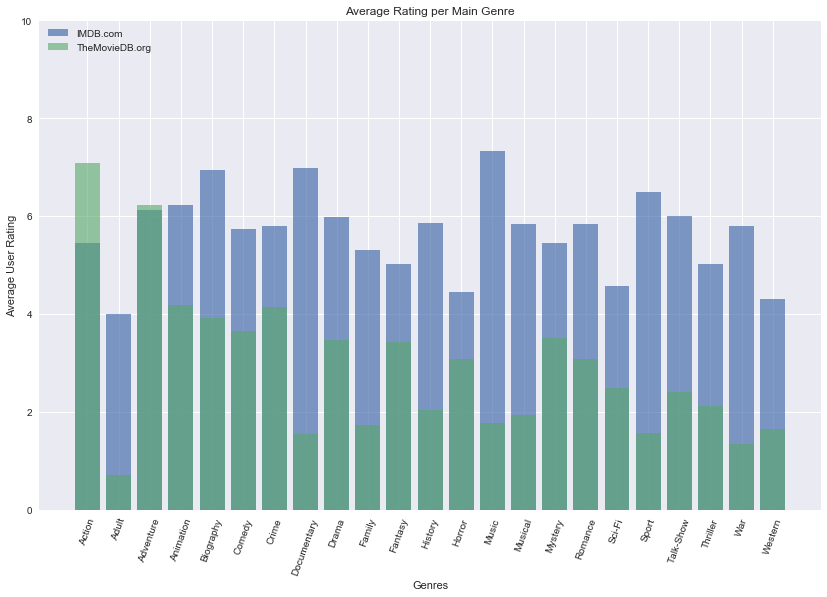

In [63]:
# # y-axis
imdb_rating = all_genres.groupby('Genre_1')['imdb_avg_rating'].mean()
db_rating = all_genres.groupby('Genre_1')['db_popularity'].mean()
# imdb_rating = src.genre_pandas_mean(all_genres, 'imdb_avg_rating')
# db_rating = src.genre_pandas_mean(all_genres, 'db_popularity')

# x-axis
categories = imdb_rating.index

# creating a bar plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(categories, imdb_rating, alpha=0.7)
ax.bar(categories, db_rating, alpha=0.6)

# setting title and axis labels
ax.set_xlabel('Genres')
plt.xticks(rotation=70)
ax.set_ylabel('Average User Rating')
ax.set_title('Average Rating per Main Genre')

# setting legend and ylim
plt.legend(['IMDB.com', 'TheMovieDB.org'], loc=2)
ax.set_ylim(0, 10)

plt.savefig('visualizations/avg_rating.pdf')
plt.show()

## Conclusions:


## Next Steps
Further analyses could yield additional insights to further produce popular movies:

- Better prediction of animals that are likely to have long stays. This modeling could use already available data, such as breed and intake condition.

- Model need for medical support. This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- Predicting undesirable outcomes. This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.